# Descriptive Statistics Review

In this second part of the lab, we are going to continue working with the data that we cleaned in the last part. 
Be sure to continue to write clean code and comment your work well!

First, lets import our libraries and the data we saved. 

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import sem

In [3]:
diamonds = pd.read_csv('diamonds_clean.csv')
diamonds = diamonds.drop('Unnamed: 0', axis=1)

Now that we cleaned our data, we can proceed with some exploratory analysis. We will analyze the features that affect price the most.

Let's start by looking at how the charateristics of a diamond (especially the price, since that's our focus) change based on its color. Remember that you can use the `groupby()` method in pandas. 

**Using the `describe()` method, take a look on the dataset paying special attention to the variability. Comment what you see.**

In [4]:
#your code here
diamonds.describe()

,carat,color,clarity,depth,table,price,x,y,z
count,53932.000000,53932.000000,53932.000000,53932.000000,53932.000000,53932.000000,53932.000000,53932.000000,53932.000000
mean,0.797879,3.405789,3.051101,61.749336,57.457029,3932.136079,5.732007,5.735254,3.540265
std,0.473986,1.701165,1.647109,1.432514,2.234064,3988.734835,1.119670,1.140343,0.702667
min,0.200000,0.000000,0.000000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,2.000000,2.000000,61.000000,56.000000,949.750000,4.710000,4.720000,2.910000
50%,0.700000,3.000000,3.000000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,5.000000,4.000000,62.500000,59.000000,5324.000000,6.540000,6.540000,4.040000
max,5.010000,6.000000,7.000000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [ ]:
#your comments here
The mean value is now close to the 50% quartile, but the std for the price still is super hight.


Let's proceed to check each feature separately. 

**Before starting, which features do you think that will affect the price most and why? You will contrast your hypotheses with your results.**

In [ ]:
#your hypotheses here
the quality is determined by color and clarity. But the carat (weight) is also related to price.

## 1. The `color` column
First, let's look at the color column.

**For each different color, find the mean of each column. You should have a matrix with every color as rows and the columns `carat`, `clarity`, etc as columns.**

In [5]:
#your code here
diamonds_color = diamonds.groupby('color').mean()
diamonds_color

,carat,clarity,depth,table,price,x,y,z
color,,,,,,,,
0,1.162137,2.776353,61.887215,57.812393,5323.818020,6.519338,6.518105,4.033251
1,1.026927,2.964035,61.846385,57.577278,5091.874954,6.222826,6.222730,3.846369
2,0.911627,2.933871,61.836557,57.518176,4484.958805,5.984776,5.986256,3.699147
3,0.771088,3.463419,61.757449,57.288060,3998.145173,5.678549,5.681198,3.507966
4,0.736509,3.134605,61.694087,57.433148,3725.091938,5.616727,5.620529,3.465938
5,0.657867,2.969889,61.662090,57.491201,3076.752475,5.411580,5.419029,3.340689
6,0.657715,2.691025,61.698066,57.404355,3168.106436,5.417851,5.421928,3.343320


**What do you see? Pay special attention to the relationship between price and color.**

In [ ]:
#your thoughts here

the worst color has the highest mean price, and the best color rating has almost the lowest mean price, i could indicate that the color 
is not so important, but at the same time, we are comparing differente carats, so we will need to analyze this better.

Let's go further into the color feature. We will plot the frequency distribution of the diamonds color in our dataset. 

**Plot the distribution and analyze it. Remember that you can use the pandas `plot()` method.**

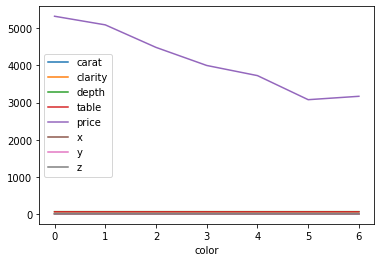

In [8]:
#your code here
diamonds_color.plot()

In [ ]:
#your comments here

The price seems to decrease accordinly to the color of the diamond.


## 2.The `carat` column 

Let's check the `carat` (weight), since this could also be a potential factor for price change.

**Find the mean of each column for each value of `carat` using the `groupby` method. Then comment your results.**

In [11]:
#your code here
diamonds_carat = diamonds.groupby('carat').mean()
diamonds_carat

,color,clarity,depth,table,price,x,y,z
carat,,,,,,,,
0.20,5.166667,2.833333,61.100000,59.333333,365.166667,3.786667,3.753333,2.303333
0.21,5.444444,2.666667,60.511111,58.444444,380.222222,3.874444,3.837778,2.332222
0.22,4.800000,2.600000,61.620000,60.400000,391.400000,3.898000,3.848000,2.386000
0.23,4.518771,4.901024,61.426621,58.034130,486.143345,3.946382,3.973379,2.431468
0.24,4.185039,4.972441,61.599213,57.488189,505.185039,3.990157,4.019331,2.465591
...,...,...,...,...,...,...,...,...
4.00,1.000000,0.000000,63.300000,58.000000,15984.000000,10.010000,9.940000,6.310000
4.01,0.500000,0.000000,61.750000,61.500000,15223.000000,10.080000,10.020000,6.205000
4.13,2.000000,0.000000,64.800000,61.000000,17329.000000,10.000000,9.850000,6.430000


In [ ]:
#your comments

Seems that exists a correlation with the carat and the price.



**Plot a histogram of the `carat` column by using the `plot` method (see the docs to find an easy way to do so). What is happening?**

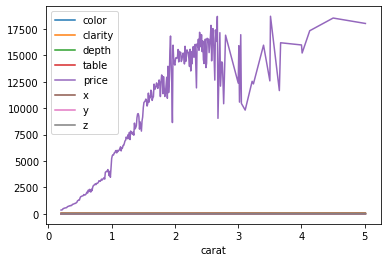

In [12]:
#your code here
diamonds_carat.plot()
 #i thing that this is the easy way.

In [ ]:
I can confir that exists a correlation with the carat and the price, but not a linear (?) one.

# 3. The `table` and `clarity` column
Finally, let's check the `table`.

**Find the mean of each column for each value of `table` using the `groupby` method. Then comment your results.**

In [14]:
#your code here
diamonds_table = diamonds.groupby('table').mean()
diamonds_table

,carat,color,clarity,depth,price,x,y,z
table,,,,,,,,
43.0,1.0400,1.0,4.00,62.90,4997.0,6.450,6.410,4.040
44.0,0.2900,5.0,4.00,62.80,474.0,4.200,4.240,2.650
49.0,0.6500,3.0,3.00,64.25,2290.5,5.355,5.320,3.425
50.0,1.5100,3.0,2.00,61.50,8995.5,7.380,7.295,4.510
50.1,0.9400,2.0,1.00,66.00,3353.0,6.130,6.170,4.060
...,...,...,...,...,...,...,...,...
71.0,0.6800,3.0,2.00,58.00,1633.0,5.850,5.700,3.350
73.0,0.6025,4.5,3.25,68.90,2406.5,5.520,5.465,3.745
76.0,0.7900,3.0,2.00,65.30,2362.0,5.520,5.130,3.350


In [ ]:
#your comments here
doesn't seem to have a relation between table and price.

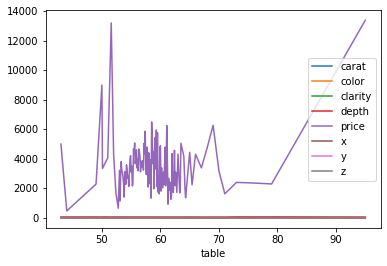

In [15]:
diamonds_table.plot()

In [ ]:
#uau! don´t know how to interpreted (super uninstable relation between table and price :) )

**Finally, do the same with the `clarity` column.**

In [16]:
#your code here
diamonds_clarity = diamonds.groupby('clarity').mean()
diamonds_clarity

,carat,color,depth,table,price,x,y,z
clarity,,,,,,,,
0,1.283846,2.968961,62.734278,58.303779,3924.168691,6.761093,6.709379,4.224688
1,1.077602,3.469967,61.771567,57.926823,5062.267356,6.404157,6.399890,3.952642
2,0.850482,3.448450,61.853042,57.662541,3996.001148,5.888383,5.888256,3.640636
3,0.763850,3.494370,61.724249,57.418040,3924.166204,5.658633,5.659782,3.492788
4,0.727108,3.161812,61.667968,57.313966,3839.144308,5.572860,5.582512,3.441428
5,0.596202,3.569483,61.663778,57.024990,3283.737071,5.218454,5.232118,3.221465
6,0.503131,3.350848,61.624521,56.883881,2519.512315,4.961721,4.976437,3.062132
7,0.505123,3.101676,61.510615,56.507207,2864.839106,4.968402,4.989827,3.061659


In [ ]:
#your comments here
Price doesn't seem to be afected with the diamond's clarity, but once again i think that we can see comparing different carats. 

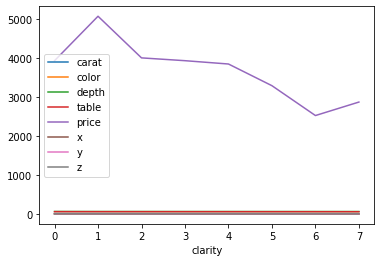

In [17]:
diamonds_clarity.plot()

In [ ]:
It looks like our first graph when we saw that thas no relation between price and color (and it could be negative because decrease)

**After looking at your results, which features do you think will affect price the most now? Regarding your hypotheses, do they match your final results? Provide a small overview.**

In [ ]:
#your thoughts here

It seems that carat is the factor most important to impact the price.

# 4. Taking a deeper look with plots and correlations

To take deeper look, we will use the `pairplot` method of `seaborn` library. This method plots a scatterplot for each pair of features and in the diagonal the distribution of the feature.

So if you have many features it will take a while, be careful!


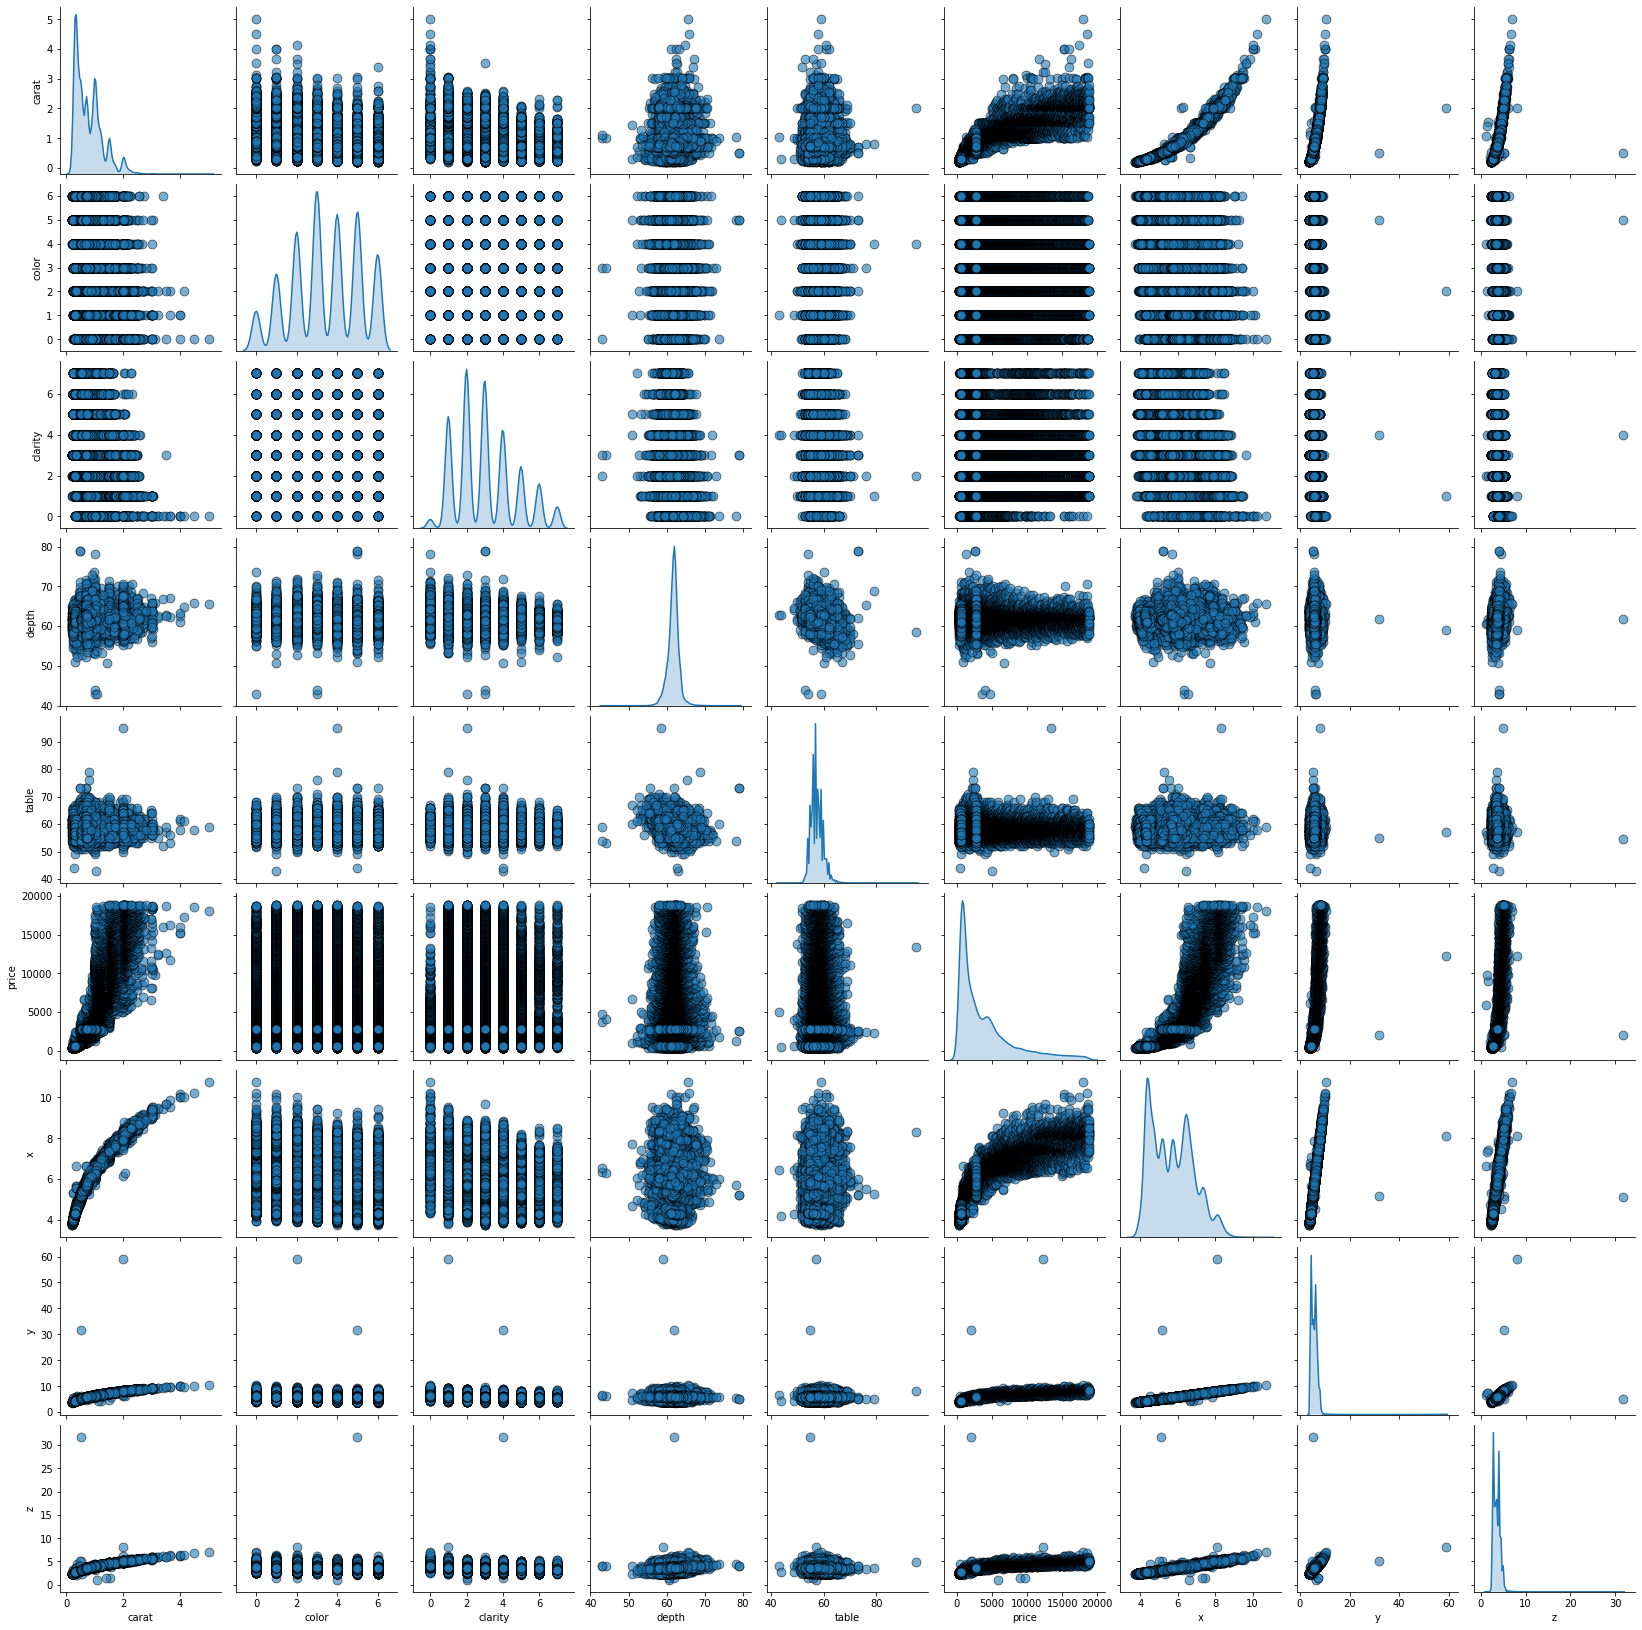

In [18]:
#Run this code
import seaborn as sns
sns.pairplot(diamonds, diag_kind = 'kde', plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'})

**What do you see here? What relationships between variables are the most interesting?**

In [ ]:
#your thoughts here

can we please talk about these graphs? got a little confused about it.

Now we will see a correlation matrix with a plot. As you know a higher correlation means that the feature could be an effect (**but is not for sure**) for the changes on the price.

We will see this with a matrix with colors. A lighter color means greater correlation. 

This is done with the `seaborn` library as well.

In [27]:
correlation = diamonds.corr()
correlation

,carat,color,clarity,depth,table,price,x,y,z
carat,1.000000,-0.291447,-0.352877,0.028221,0.181658,0.921610,0.977765,0.953989,0.961049
color,-0.291447,1.000000,-0.025678,-0.047300,-0.026511,-0.172569,-0.270780,-0.264025,-0.270112
clarity,-0.352877,-0.025678,1.000000,-0.067286,-0.160401,-0.146886,-0.373009,-0.359157,-0.370374
depth,0.028221,-0.047300,-0.067286,1.000000,-0.295700,-0.010670,-0.025097,-0.029141,0.094949
table,0.181658,-0.026511,-0.160401,-0.295700,1.000000,0.127165,0.196130,0.184530,0.152524
price,0.921610,-0.172569,-0.146886,-0.010670,0.127165,1.000000,0.887227,0.867872,0.868229
x,0.977765,-0.270780,-0.373009,-0.025097,0.196130,0.887227,1.000000,0.974933,0.975445
y,0.953989,-0.264025,-0.359157,-0.029141,0.184530,0.867872,0.974933,1.000000,0.956765
z,0.961049,-0.270112,-0.370374,0.094949,0.152524,0.868229,0.975445,0.956765,1.000000


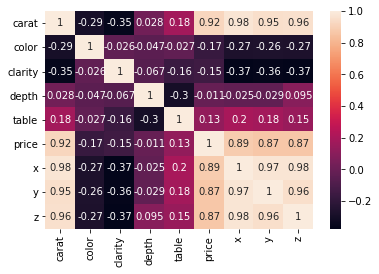

In [29]:
# your code here

sns.heatmap(correlation, annot=True)

**What do you see here? Regarding the results before, does it fit with them?**

In [ ]:
#your thoughts here
We can see a big relation beteewn price, x,y,z and carat.

Finally, we will calculate the linear regression between the price and the weight. This will be done first by plotting it with the `seaborn` library and then calculating the error with the `scipy` library.

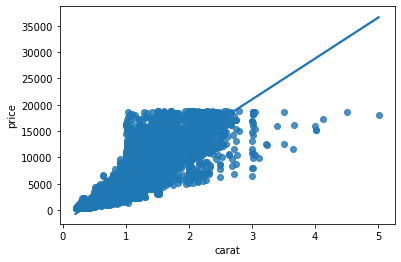

In [30]:
# your code here

sns.regplot(x = 'carat', y = 'price', data = diamonds)

**What do you think?**

In [ ]:
#your thoughts here

It looks like exists a linear regression between price and carat until diamonds with 3 
carats and than the price looks pretty much the same it is possible(?)

**Would you do any other checks on other features? Do you have any comments regarding `carat`?**

In [ ]:
#your thoughts here

**Conclusion**

**From our dataset** we can conclude that although `color` and `clarity` have a classification, and thus an assigned importance or weight, they do not influence the monetary value of a diamond in determining way. While it is true that different colors or clarities may have different prices, upon closer examination those variations in price seem to be linked to `carat` (weight) and its `dimensions`. In our analysis, the key factor to determining a diamond's value was placed solely in the aforementioned features, since we can see in our correlation coefficients and in the coefficient of determination that these features are closely related.